In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import metrics, regularizers
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.decomposition import PCA

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
ts1 = pd.read_csv(r"Data/TS1.csv", encoding='unicode_escape')
ts2 = pd.read_csv(r"Data/TS2.csv", encoding='unicode_escape')
ts8 = pd.read_csv(r"Data/TS8.csv", encoding='unicode_escape', on_bad_lines='skip', low_memory=False)

## Data Cleaning

In [4]:
ts1.head()

,Rep,Cust,Customer Name,Group,Part Number,Description,Doc,Line,Date,Time,Qty,Unit,Disc%,Cost,Range
0,2,193750,ROCK AUTO LLC,ACC,ACC31019,LITERIDER 73-96 F-Series,01V4661208,1,Nov 07 22,08:22,1,308.74,NaN,262.33,0028
1,2,193750,ROCK AUTO LLC,ACC,ACC31029,LITERIDER 73-96 F-Series,01V4786521,2,Jan 04 23,16:33,1,296.23,NaN,248.63,0028
2,2,193750,ROCK AUTO LLC,ACC,ACC31109,LITERIDER 82-11 Ranger &,01V4689424,1,Nov 20 22,15:23,1,283.15,NaN,237.97,0028
3,2,193750,ROCK AUTO LLC,ACC,ACC31109,LITERIDER 82-11 Ranger &,01V4771133,1,Dec 29 22,08:28,1,283.15,NaN,236.97,0028
4,2,193750,ROCK AUTO LLC,ACC,ACC31129,LITERIDER 01-06 Explorer,01V4683310,1,Nov 16 22,15:27,1,283.15,NaN,243.50,0028


In [5]:
ts1.drop(columns=['Rep', 'Cust', 'Customer Name', 'Description', 'Doc', 'Disc%', 'Range'], inplace=True)
ts2.drop(columns=['Rep', 'Cust', 'Customer Name', 'Description', 'Doc', 'Disc%', 'Range'], inplace=True)
ts8.drop(columns=['Rep', 'Cust', 'Customer Name', 'Description', 'Doc', 'Disc%', 'Range'], inplace=True)

In [6]:
df_list = [ts1, ts2, ts8]

for i in df_list:
    print(f'Missing Values: {i.isnull().sum()}')

Missing Values: Group          8
Part Number    0
Line           0
Date           0
Time           0
Qty            0
Unit           0
Cost           0
dtype: int64
Missing Values: Group          1
Part Number    0
Line           0
Date           0
Time           0
Qty            0
Unit           0
Cost           0
dtype: int64
Missing Values: Group           1
Part Number     0
Line            0
Date            0
Time            0
Qty             0
Unit           21
Cost            0
dtype: int64


In [7]:
for i in df_list:
    i.dropna(inplace=True)

In [8]:
df_list = [ts1, ts2, ts8]

for i in df_list:
    print(f'Missing Values: {i.isnull().sum()}')

Missing Values: Group          0
Part Number    0
Line           0
Date           0
Time           0
Qty            0
Unit           0
Cost           0
dtype: int64
Missing Values: Group          0
Part Number    0
Line           0
Date           0
Time           0
Qty            0
Unit           0
Cost           0
dtype: int64
Missing Values: Group          0
Part Number    0
Line           0
Date           0
Time           0
Qty            0
Unit           0
Cost           0
dtype: int64


In [9]:
for i in df_list:
    print(f'Duplicate Values: {i.duplicated().sum()}')

Duplicate Values: 737
Duplicate Values: 639
Duplicate Values: 540


In [10]:
for i in df_list:
    i.drop_duplicates(inplace=True)

In [11]:
for i in df_list:
    print(f'Duplicate Values: {i.duplicated().sum()}')

Duplicate Values: 0
Duplicate Values: 0
Duplicate Values: 0


In [12]:
for i in df_list:
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222302 entries, 0 to 223046
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Group        222302 non-null  object 
 1   Part Number  222302 non-null  object 
 2   Line         222302 non-null  int64  
 3   Date         222302 non-null  object 
 4   Time         222302 non-null  object 
 5   Qty          222302 non-null  int64  
 6   Unit         222302 non-null  float64
 7   Cost         222302 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 15.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 163148 entries, 0 to 163787
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Group        163148 non-null  object 
 1   Part Number  163148 non-null  object 
 2   Line         163148 non-null  int64  
 3   Date         163148 non-null  object 
 4   Time         163148

In [13]:
ts8['Cost'] = ts8['Cost'].astype(float)
ts8['Line'] = ts8['Line'].astype(float)

In [14]:
for i in df_list:
    i['Date'] = pd.to_datetime(i['Date'])

In [15]:
for i in df_list:
    i.set_index(['Group', 'Date'], inplace=True)

In [16]:
ts8.head()

Part Number  Line   Time  Qty    Unit    Cost
Group Date                                                    
AAE   2022-11-06    AAE3004N   1.0  16:46  1.0  292.05  263.11
      2022-12-08    AAE3004N   1.0  16:20  1.0  292.05  263.11
      2023-01-03    AAE3004N   1.0  08:40  1.0  292.05  263.11
      2023-01-05    AAE3004N   1.0  08:13  1.0  292.05  263.11
      2023-01-29    AAE3004N   1.0  17:14  1.0  292.05  263.11

In [17]:
plot_ts1 = ts1.loc['SKP']
plot_ts2 = ts2.loc['SKP']
plot_ts8 = ts8.loc['SKP']

In [18]:
skp_ts1 = plot_ts1.groupby('Date').sum()
skp_ts2 = plot_ts2.groupby('Date').sum()
skp_ts8 = plot_ts8.groupby('Date').sum()

C:\Users\zachd\AppData\Local\Temp\ipykernel_14468\609815206.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  skp_ts1 = plot_ts1.groupby('Date').sum()
C:\Users\zachd\AppData\Local\Temp\ipykernel_14468\609815206.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  skp_ts2 = plot_ts2.groupby('Date').sum()
C:\Users\zachd\AppData\Local\Temp\ipykernel_14468\609815206.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  skp_ts

In [19]:
def plot_results(data_list, y, titles):
    with plt.style.context(['seaborn-muted', 'dark_background']):
        fig, ax = plt.subplots(3,1,figsize=(20,15))
        ax = ax.ravel()

        for i, data in enumerate(data_list):

            sns.lineplot(data=data, x=data.index, y=y, ax=ax[i], zorder=3, marker='o')
            
            ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
            ax[i].set_xlim(data.index.min(), data.index.max())
            ax[i].set_xlabel('Dates Bimonthly', fontsize=12)
            ax[i].set_ylim(data[y].min(), data[y].max())
            ax[i].grid(zorder=0, alpha=0.5, color='grey', linestyle='--')

            if y == 'Cost':
                ax[i].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'${x:,.0f}'))
                ax[i].set_ylabel('RockAuto Product Sales Bimonthly', fontsize=12)
                pass
            else:
                ax[i].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))
                ax[i].set_ylabel(f"{y}s Per Invoiced Product Sale", fontsize=12)
                pass
                
            for i in range(len(titles)):
                ax[i].set_title(f'({titles[i]}) Product Sales by Date and Customer', fontsize=20)
            
            ax[i].tick_params(axis='both', which='major', labelsize=12)
            
    plt.tight_layout()
    plt.show()

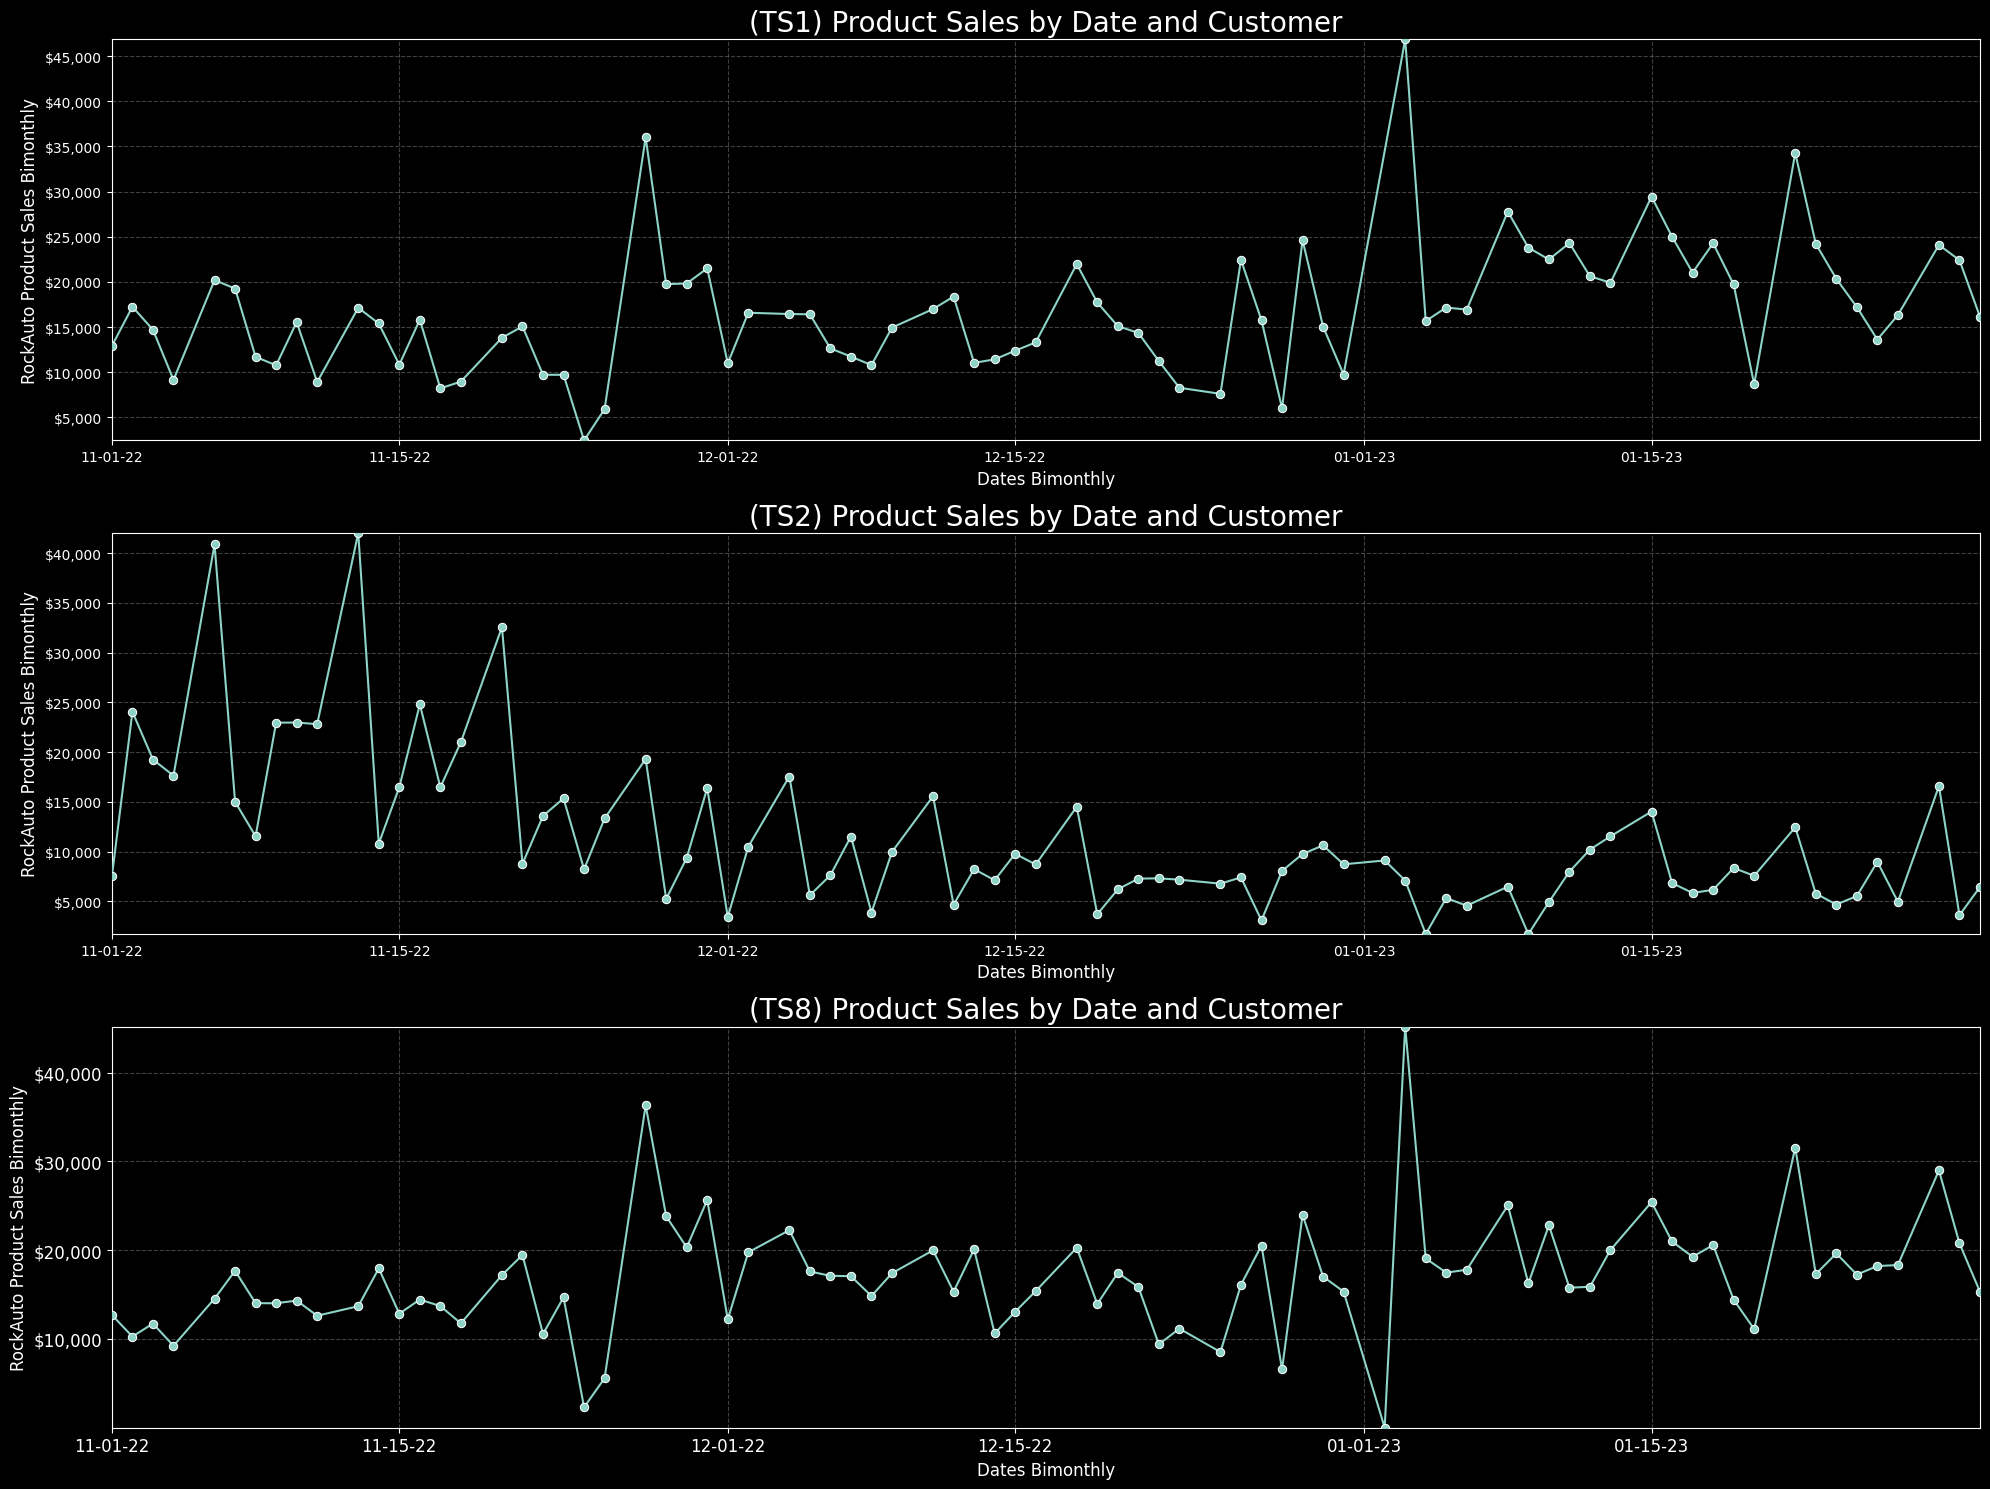

In [20]:
plot_results([skp_ts1, skp_ts2, skp_ts8], 'Cost', ['TS1', 'TS2', 'TS8'])

In [21]:
plot_ts1 = ts1.groupby('Date').sum()
plot_ts2 = ts2.groupby('Date').sum()
plot_ts8 = ts8.groupby('Date').sum()

C:\Users\zachd\AppData\Local\Temp\ipykernel_14468\1191143310.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot_ts1 = ts1.groupby('Date').sum()
C:\Users\zachd\AppData\Local\Temp\ipykernel_14468\1191143310.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot_ts2 = ts2.groupby('Date').sum()
C:\Users\zachd\AppData\Local\Temp\ipykernel_14468\1191143310.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot_ts8 = 

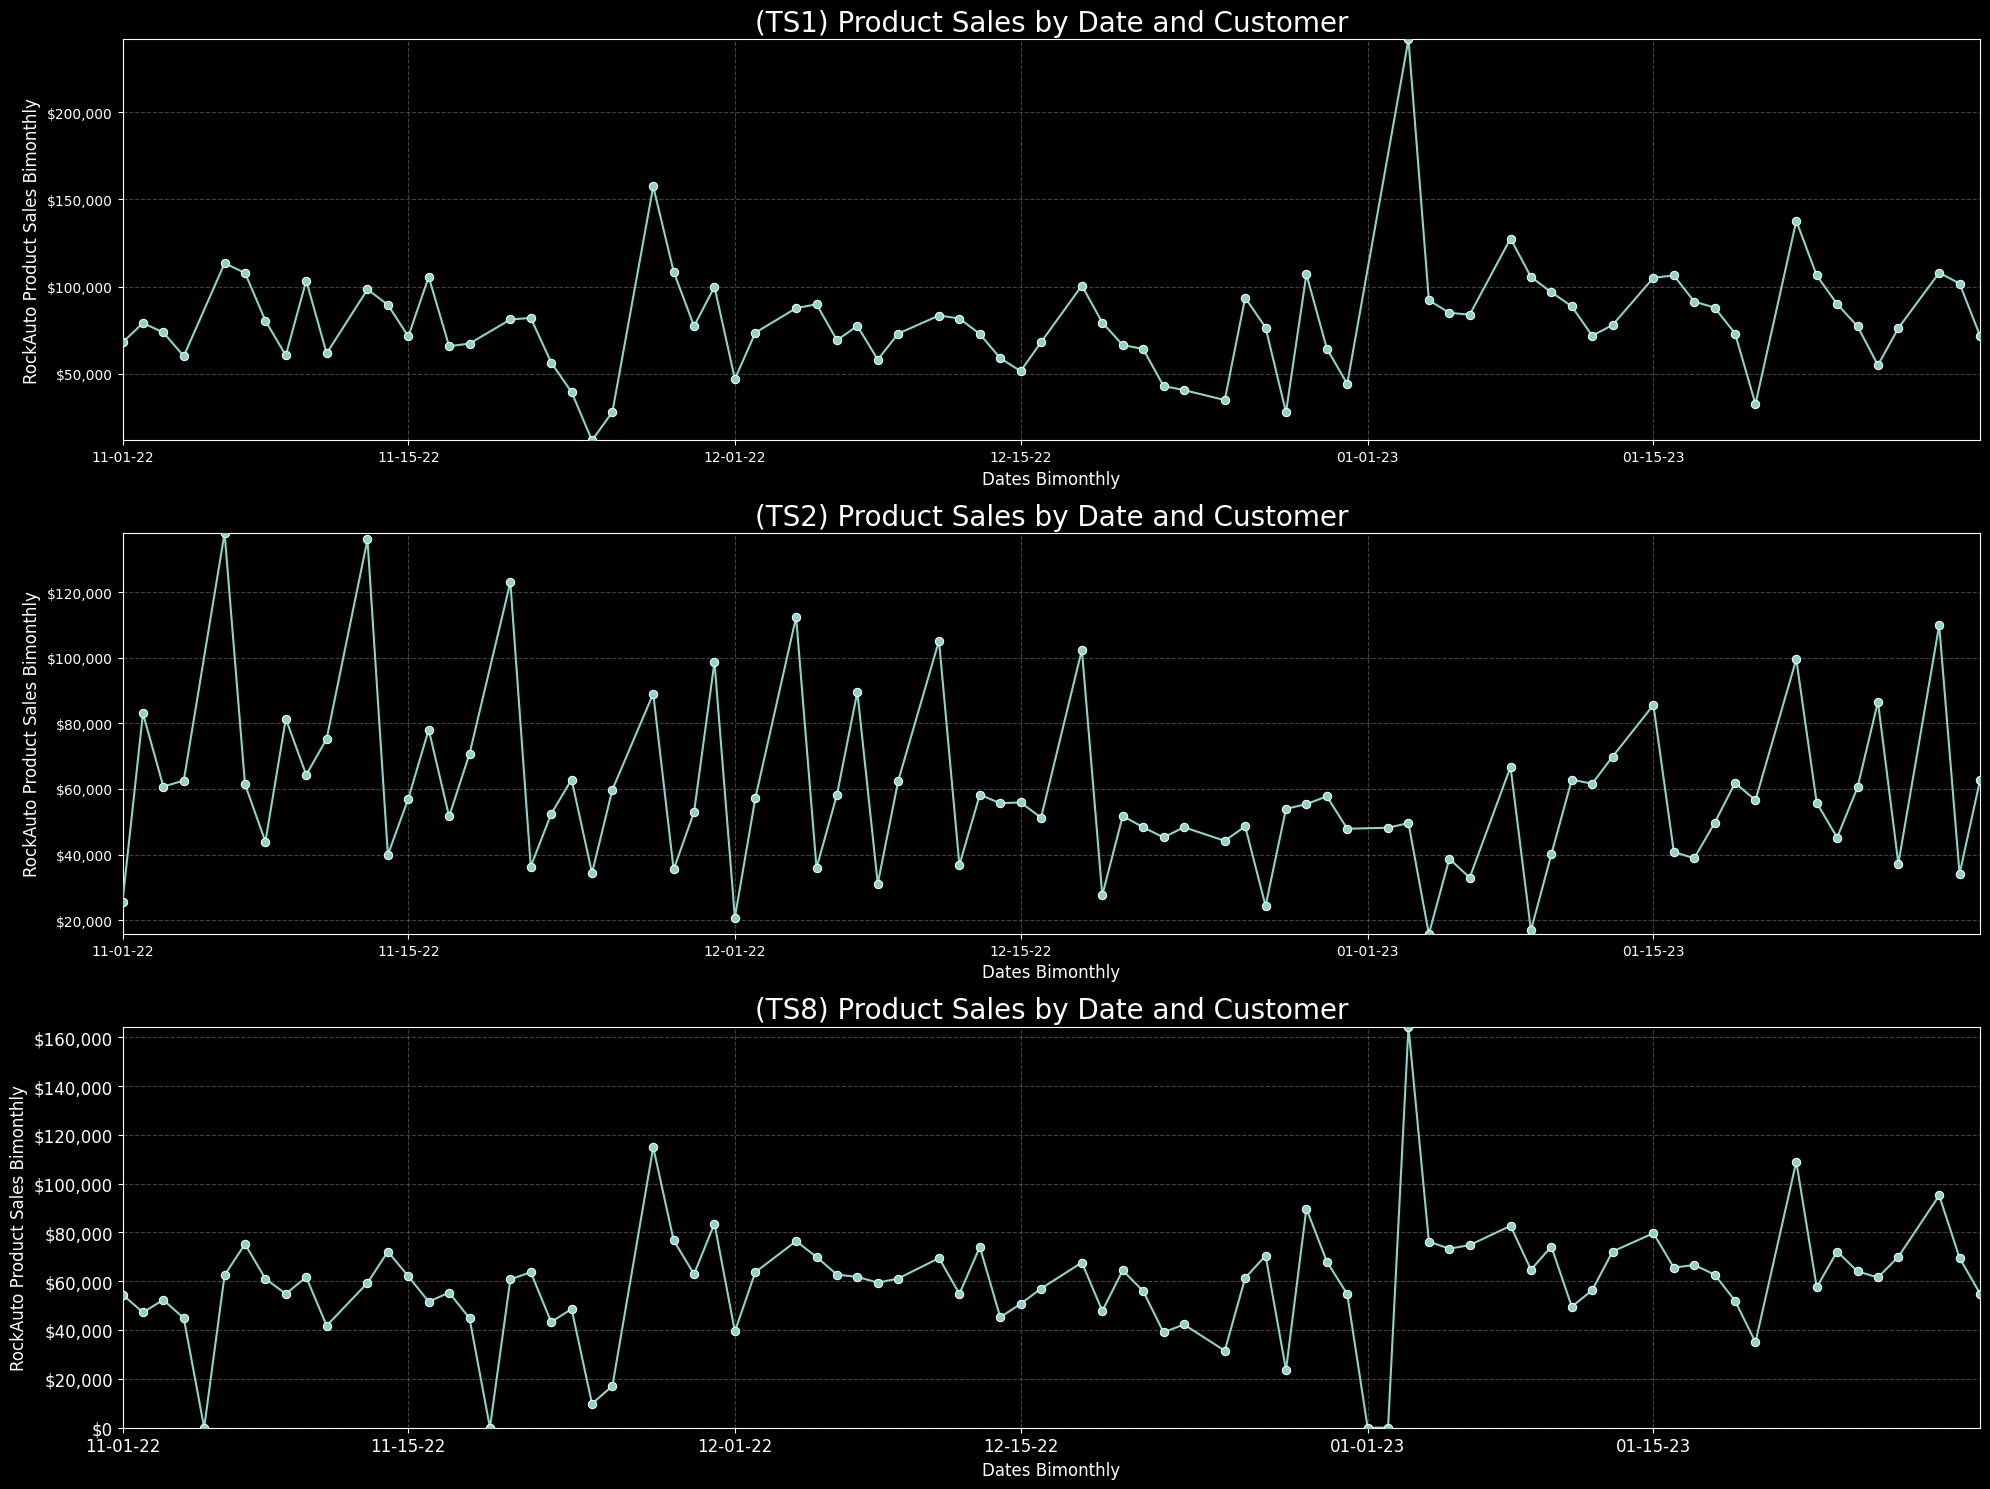

In [22]:
plot_results([plot_ts1, plot_ts2, plot_ts8], 'Cost', ['TS1', 'TS2', 'TS8'])

In [23]:
def density_plot(data_list, y, titles):
    with plt.style.context(['seaborn-muted', 'dark_background']):

        fig, ax = plt.subplots(3,1,figsize=(20,15))

        ax = ax.ravel()

        for i, data in enumerate(data_list):
            
            sns.kdeplot(data=data, x=y, ax=ax[i], fill=True, bw_method=0.05)
            ax[i].set_ylabel('')
            ax[i].set_yticks([])

            if y == 'Cost':
                ax[i].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'${x:,.0f}'))
                ax[i].set_xlabel('RockAuto Product Sales Bimonthly', fontsize=12)
                pass
            else:
                ax[i].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))
                ax[i].set_xlabel(f"{y}s Per Invoiced Product Sale", fontsize=12)
                pass

            ax[i].grid(zorder=0, alpha=0.5, color='grey', linestyle='--')

            for i in range(len(titles)):
                ax[i].set_title(f'({titles[i]})', fontsize=20)
            
            ax[i].tick_params(axis='both', which='major', labelsize=12)
            

            
        plt.tight_layout()
        plt.show()

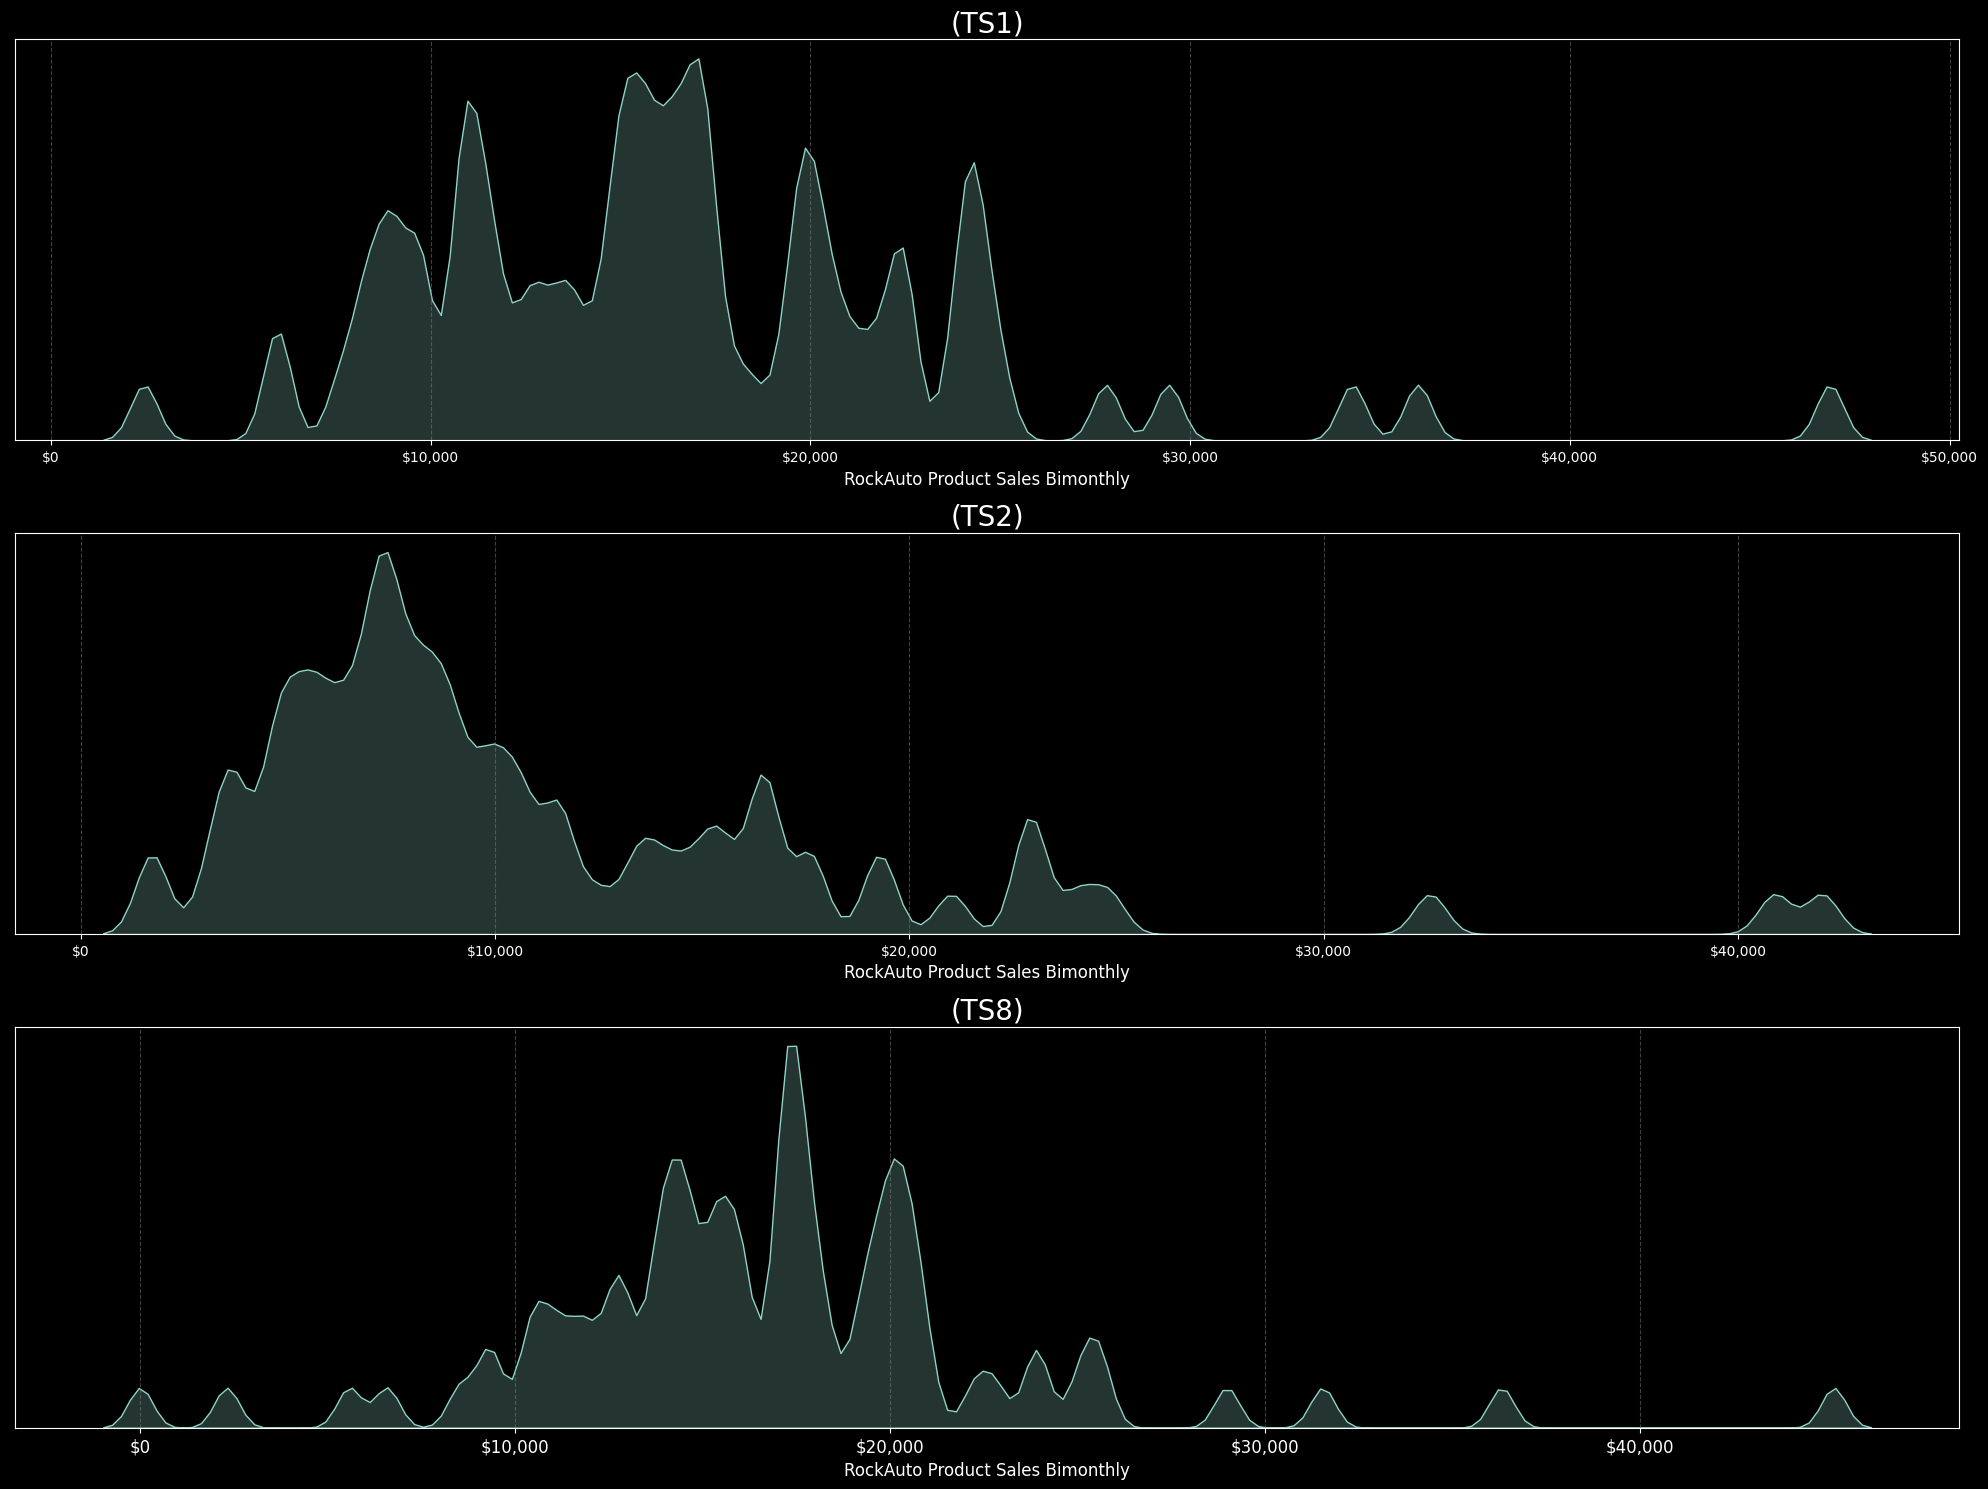

In [24]:
density_plot([skp_ts1, skp_ts2, skp_ts8], 'Cost', ['TS1', 'TS2', 'TS8'])

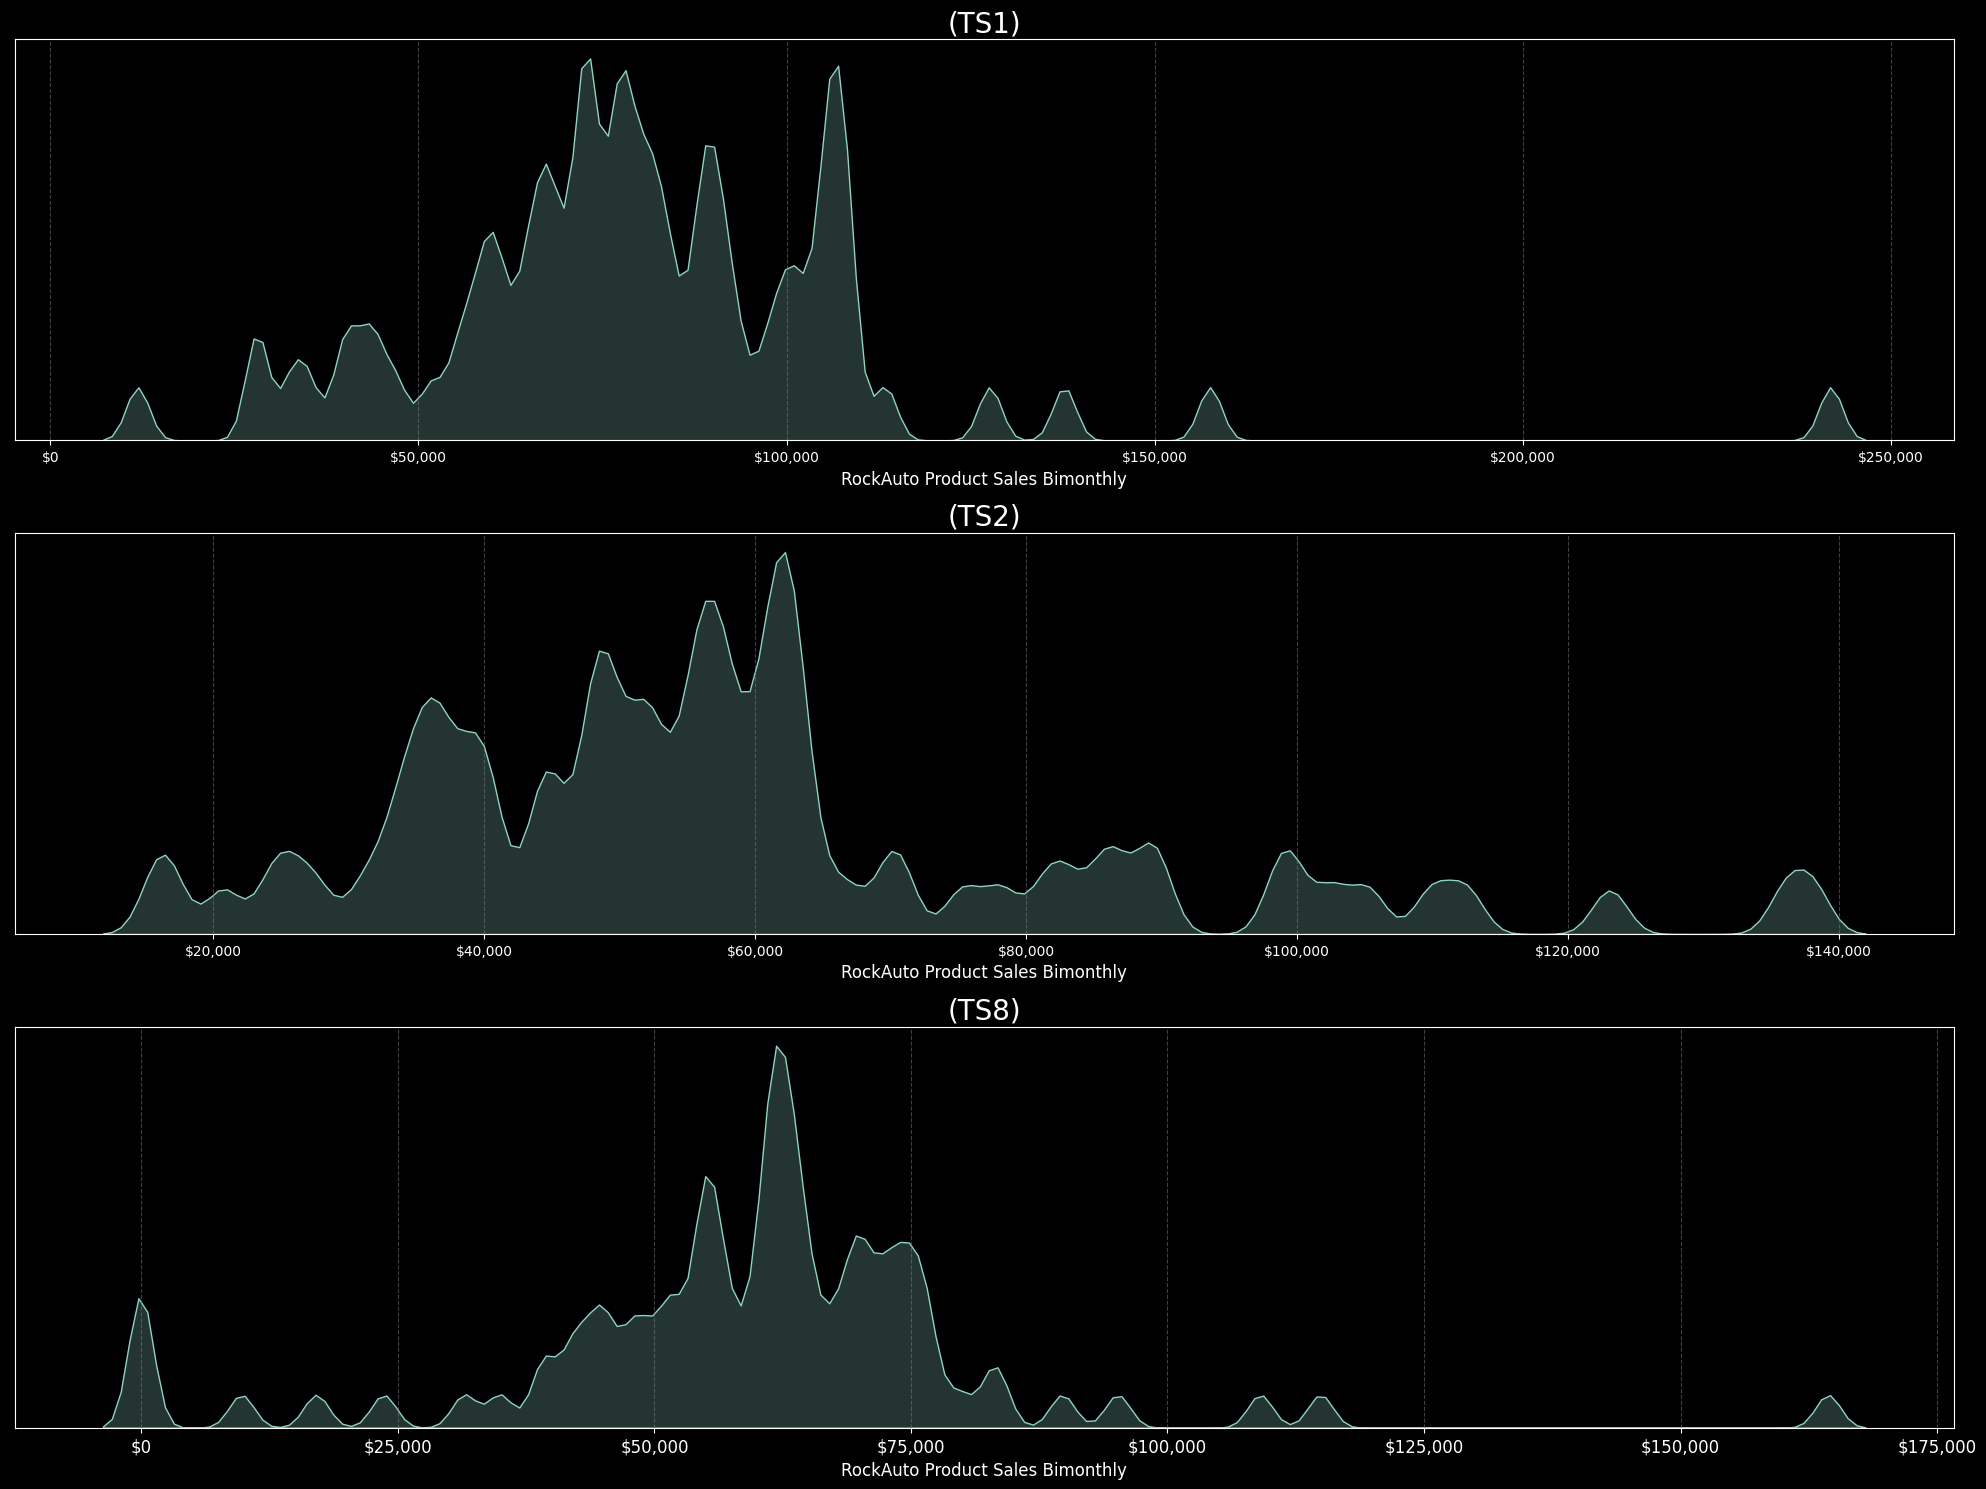

In [25]:
density_plot([plot_ts1, plot_ts2, plot_ts8], 'Cost', ['TS1', 'TS2', 'TS8'])

# Model Evaluation

In [26]:
# Creating a function that combines all dataframes into a single dataframe
def combine_dataframes(data_list):
    # Creating a new dataframe
    combined = pd.concat(data_list, ignore_index=True)
    return combined

df = combine_dataframes([ts1, ts2, ts8])
df.head()

,Part Number,Line,Time,Qty,Unit,Cost
0,ACC31019,1.0,08:22,1.0,308.74,262.33
1,ACC31029,2.0,16:33,1.0,296.23,248.63
2,ACC31109,1.0,15:23,1.0,283.15,237.97
3,ACC31109,1.0,08:28,1.0,283.15,236.97
4,ACC31129,1.0,15:27,1.0,283.15,243.50


In [27]:
X = df.drop(columns = ['Cost', 'Part Number', 'Line'])
y = df['Cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

NameError: name 'train_test_split' is not defined

In [ ]:
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

cat = make_column_selector(dtype_include='object')
num = make_column_selector(dtype_include='number')

preprocessor = make_column_transformer((scaler, num), (ohe, cat), remainder='passthrough')

transformer = make_pipeline(preprocessor, PCA(n_components=0.95))
transformer.fit(X_train, y_train)

In [ ]:
# Custom function that plots learning cycles of model
def plot_history(history):
    
    metrics = list(history.history.keys())
    for metric in metrics:
        if not 'val' in metric:
            plt.plot(history.history[f'{metric}'], label=f'{metric}')
            if f'val_{metric}' in metrics:
                plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
                
            plt.xlabel('epoch')
            plt.ylabel(f'{metric}')
            plt.legend()
            plt.title(f'{metric}')
            plt.show()

In [ ]:
def plot_results(results, param_dict):

    # Plot the mean test scores for each set of hyperparameters
    means = results['mean_test_score']
    stds = results['std_test_score']
    params = results['params']
    # Creating list of param dictionary keys
    param_names = list(param_dict.keys())

    for i, param in enumerate(param_names):
        plt.figure(figsize=(10, 5))
        plt.errorbar(param_dict[param], means[i::len(param_names)], yerr=stds[i::len(param_names)], fmt='-o', capsize=5)
        plt.title(param)
        plt.xlabel(param)
        plt.ylabel('Test score')
        plt.show()

In [ ]:
# Creating function that evaulates model
def evaulate(y_pred, y_test):
    print(f'Final MAE: {round(mean_absolute_error(y_test, y_pred), 2)}')
    print(f'Final RMSE: {round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)}')
    print(f'Final R2: {round(r2_score(y_test, y_pred), 2)}')

In [ ]:
make_pipeline().get_params()

In [ ]:
def make_model(model_name, X_train, X_test, y_trian, y_test, preprocessor, n_iter=10):
    # Creating pipeline of model and preprocessor
    model_pipe = Pipeline([('pca', preprocessor), ('model', model_name)])
    print('model made')

    # Defining the hyperparameters distribution to sample form
    param_dist = {
        'model__fit_intercept': [True, False],
        'model__n_jobs': [1,2,3,4],
        'model__positive': [True, False],
    }
    print('param_dist made')

    # Create a randomized search object to the data
    search = RandomizedSearchCV(model_pipe, param_dist, n_iter=n_iter, random_state=42, cv=5, verbose=1)
    # fit the randomized search object to the data
    # Iterate over the range of n_iter and fit the model at each step
    print('randomized search made')


    search.fit(X_train, y_train) 
    print('randomized fitted')

    results = search.cv_results_

    plot_results(results, param_dist)

    # return the best model and its hyperparameters
    best_model = search.best_estimator_
    best_params = search.best_params_

    y_pred = best_model.predict(X_test)

    evaulate(y_test, y_pred)

    return search, best_model, best_params

In [ ]:
lin_reg, best_model, best_params = make_model(LinearRegression(), X_train, X_test, y_train, y_test, transformer)